In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy

import warnings
warnings.filterwarnings("ignore")

# Problem 5

In [2]:
from math import exp, log, pi, sqrt
from typing import List


def _density(mu: float, sigma: float, size: int):
    xl = np.linspace(1e-5, 10, 500)
    yl = []
    for x in xl:
        yl.append(exp(-(log(x) - mu)**2 / (2 * sigma**2)) / (sqrt(2 * pi) * sigma * x))

    print(xl, yl)
    plt.plot(xl, yl, label=f"(mu:{mu}, sigma:{sigma})")
    return 

def unwrap_density(mu: List[float], sigma: List[float], size: int):
    for m in mu:
        for s in sigma:
            d = _density(m, s, size)
            print(d)


[1.00000000e-05 2.00500601e-02 4.00901202e-02 6.01301804e-02
 8.01702405e-02 1.00210301e-01 1.20250361e-01 1.40290421e-01
 1.60330481e-01 1.80370541e-01 2.00410601e-01 2.20450661e-01
 2.40490721e-01 2.60530782e-01 2.80570842e-01 3.00610902e-01
 3.20650962e-01 3.40691022e-01 3.60731082e-01 3.80771142e-01
 4.00811202e-01 4.20851263e-01 4.40891323e-01 4.60931383e-01
 4.80971443e-01 5.01011503e-01 5.21051563e-01 5.41091623e-01
 5.61131683e-01 5.81171743e-01 6.01211804e-01 6.21251864e-01
 6.41291924e-01 6.61331984e-01 6.81372044e-01 7.01412104e-01
 7.21452164e-01 7.41492224e-01 7.61532285e-01 7.81572345e-01
 8.01612405e-01 8.21652465e-01 8.41692525e-01 8.61732585e-01
 8.81772645e-01 9.01812705e-01 9.21852766e-01 9.41892826e-01
 9.61932886e-01 9.81972946e-01 1.00201301e+00 1.02205307e+00
 1.04209313e+00 1.06213319e+00 1.08217325e+00 1.10221331e+00
 1.12225337e+00 1.14229343e+00 1.16233349e+00 1.18237355e+00
 1.20241361e+00 1.22245367e+00 1.24249373e+00 1.26253379e+00
 1.28257385e+00 1.302613

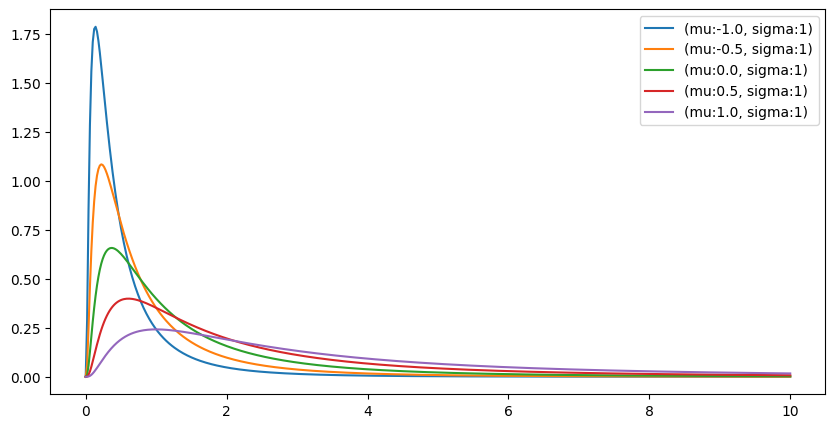

In [3]:
mu = np.linspace(-1, 1, 5)
sigma = [1]
size = [5 for _ in range(5)]

import os

if not os.path.exists("./fig"):
    os.mkdir("./fig")

plt.figure(figsize=(10, 5))
unwrap_density(mu, sigma, size)
plt.legend(loc="best")
plt.savefig("./fig/lognormal_sigma1.png")
plt.show()

# Problem 7

In [4]:
# Realize a function for any squared positive definite matrix A, calculate its cholesky decomposition.

from typing import Iterable


def my_det(A: np.ndarray) -> float:
    assert isinstance(A, np.ndarray), f"For local determination, input matrix should be np.ndarray, not {type(A)}"
    assert len(A.shape) == 2, "For local determination, input matrix should be 2-dimensional."
    assert A.shape[0] == A.shape[1], "For local determination, input matrix should be squared."

    if A.shape == (2, 2):
        return A[0, 0] * A[1, 1] - A[0, 1] * A[1, 0]
    
    if A.shape == (1, 1):
        return A[0, 0]

    det = 0
    for i in range(A.shape[0]):
        det += (-1)**i * A[0, i] * my_det(np.delete(np.delete(A, 0, 0), i, 1))
    
    return det


def my_cholesky(A: Iterable) -> np.ndarray:
    A = np.array(A)
    N = A.shape[0]
    
    # Assertion part
    assert len(A.shape) == 2, "Input matrix should be 2-dimensional."
    assert A.shape[0] == A.shape[1], "Input matrix should be squared."
    
    for i in range(1, N+1):
        if my_det(A[:i, :i]) <= 0:
            raise AssertionError("Input matrix should be positive definite.")
    
    # Calculation part
    L = np.zeros((N+1, N+1))
    for i in range(1, N+1):
        for j in range(0, N-i+1):
            if j==0:
                L[N-i-j, N-i] = np.sqrt(A[N-i-j, N-i] - np.sum(L[N-i-j, N-i+1:]**2))
            else:
                L[N-i-j, N-i] = (A[N-i-j, N-i] - np.sum(L[N-i-j, N-i+1:]*L[N-i, N-i+1:].T)) / L[N-i, N-i]
    
    return L[:N, :N]

In [5]:
import scipy.linalg as la

def compare(A: Iterable):
    X = la.cholesky(A)
    U = my_cholesky(A)

    print(f"For scipy package: U = \n{X}\n, which is actually trasposed Lower triangular.")
    print(f"U^TU = \n{np.dot(X.T, X)}\n, UU^T = \n{np.dot(X, X.T)}\n")

    print(f"For my package: U = \n{U}\n.")
    print(f"U^TU = \n{np.dot(U.T, U)}\n, UU^T = \n{np.dot(U, U.T)}\n")

A = np.array([[4, 2, 1], 
              [2, 4, 2], 
              [3, 2, 9]])

compare(A)

For scipy package: U = 
[[2.         1.         0.5       ]
 [0.         1.73205081 0.8660254 ]
 [0.         0.         2.82842712]]
, which is actually trasposed Lower triangular.
U^TU = 
[[4. 2. 1.]
 [2. 4. 2.]
 [1. 2. 9.]]
, UU^T = 
[[5.25       2.16506351 1.41421356]
 [2.16506351 3.75       2.44948974]
 [1.41421356 2.44948974 8.        ]]

For my package: U = 
[[1.73205081 0.94280904 0.33333333]
 [0.         1.88561808 0.66666667]
 [0.         0.         3.        ]]
.
U^TU = 
[[3.         1.63299316 0.57735027]
 [1.63299316 4.44444444 1.5713484 ]
 [0.57735027 1.5713484  9.55555556]]
, UU^T = 
[[4. 2. 1.]
 [2. 4. 2.]
 [1. 2. 9.]]



In [6]:
A = np.array([[4, 2, 1, 2], 
              [2, 4, 2, 5], 
              [3, 2, 9, 1],
              [3, 2, 9, 7]])

compare(A)

For scipy package: U = 
[[ 2.          1.          0.5         1.        ]
 [ 0.          1.73205081  0.8660254   2.30940108]
 [ 0.          0.          2.82842712 -0.53033009]
 [ 0.          0.          0.          0.62081935]]
, which is actually trasposed Lower triangular.
U^TU = 
[[4. 2. 1. 2.]
 [2. 4. 2. 5.]
 [1. 2. 9. 1.]
 [2. 5. 1. 7.]]
, UU^T = 
[[ 6.25        4.47446459  0.88388348  0.62081935]
 [ 4.47446459  9.08333333  1.22474487  1.43372088]
 [ 0.88388348  1.22474487  8.28125    -0.32923918]
 [ 0.62081935  1.43372088 -0.32923918  0.38541667]]

For my package: U = 
[[1.57056253 0.95094746 0.24000768 0.75592895]
 [0.         0.49186938 0.43201382 1.88982237]
 [0.         0.         2.97609524 0.37796447]
 [0.         0.         0.         2.64575131]]
.
U^TU = 
[[ 2.46666667  1.49352245  0.37694707  1.18723368]
 [ 1.49352245  1.14623656  0.44072907  1.64839446]
 [ 0.37694707  0.44072907  9.10138249  2.12271641]
 [ 1.18723368  1.64839446  2.12271641 11.28571429]]
, UU^T = 
[[4

# Rroblem 8

In [7]:
import gc
import random

from math import exp, log, pi, sqrt

exact_ans = log(2) / 6 + 5 / 36

def generate_test(N: int, randseed = 9100):
    random.seed(randseed)
    A = [random.uniform(0, 1) for _ in range(N)]
    B = [random.uniform(0, 1) for _ in range(N)]
    C = [random.uniform(0, 1) for _ in range(N)]

    delta = [b**2 - 4*a*c for a, b, c in zip(A, B, C)]
    ans = []
    for x in delta:
        if x>=0 :
            ans.append(1)
        else:
            ans.append(0)

    absolute_err = abs(sum(ans)/N - exact_ans)
    relative_err = abs((sum(ans)/N - exact_ans)/exact_ans)
    
    print(f"For N = {N}:\nAbsolute Error: {absolute_err}\nRelative Error: {relative_err}\n")
    gc.collect()

generate_test(10000)
generate_test(50000)
generate_test(500000)
generate_test(1000000)

For N = 10000:
Absolute Error: 0.0002134189822131094
Relative Error: 0.0008388668454160047

For N = 50000:
Absolute Error: 0.0012534189822130948
Relative Error: 0.004926701536528329

For N = 500000:
Absolute Error: 0.0007205810177869365
Relative Error: 0.0028323231560254875

For N = 1000000:
Absolute Error: 0.000868581017786918
Relative Error: 0.0034140534774529463



## Do some whitening now.

In [8]:
from typing import List

def correlation(X: List[float], Y: List[float]):
    return np.corrcoef(X, Y)[0, 1]

def whitening(X: List[List[float]]) -> List[List[float]]:
    N = len(X)
    for i in range(N):
        for j in range(i):
            X[i] = X[i] - correlation(X[i], X[j]) / correlation(X[j], X[j]) * X[j]
        
        X[i] = X[i] / (np.std(X[i]) * sqrt(12))
        X[i] = X[i] - (np.mean(X[i]) - 0.5)
    
    for i in range(N):
        for j in range(i):
            assert abs(correlation(X[i], X[j])) < 1e-4, abs(correlation(X[i], X[j]))
        assert np.var(X[i]) - 1 / 12 < 1e-4, np.var(X[i]) - 1 / 12
        assert abs(np.mean(X[i]) - 0.5) < 1e-4, abs(np.mean(X[i]) - 0.5)

    return X

def whitened_generate_test(N: int, randseed = 9100):
    random.seed(randseed)
    A = [random.uniform(0, 1) for _ in range(N)]
    B = [random.uniform(0, 1) for _ in range(N)]
    C = [random.uniform(0, 1) for _ in range(N)]

    A, B, C = whitening([A, B, C])

    delta = [b**2 - 4*a*c for a, b, c in zip(A, B, C)]
    ans = []
    for x in delta:
        if x>=0 :
            ans.append(1)
        else:
            ans.append(0)

    absolute_err = abs(sum(ans)/N - exact_ans)
    relative_err = abs((sum(ans)/N - exact_ans)/exact_ans)
    
    print(f"For N = {N}:\nAbsolute Error: {absolute_err}\nRelative Error: {relative_err}\n")
    gc.collect()

whitened_generate_test(10000)
whitened_generate_test(50000)
whitened_generate_test(500000)
whitened_generate_test(1000000)

For N = 10000:
Absolute Error: 0.0021134189822130667
Relative Error: 0.008307026377255765

For N = 50000:
Absolute Error: 0.0013734189822131038
Relative Error: 0.005398374770118255

For N = 500000:
Absolute Error: 0.00028458101778688905
Relative Error: 0.0011185770739820335

For N = 1000000:
Absolute Error: 4.418982213094669e-06
Relative Error: 1.7369296913554763e-05



# Problem 9

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader.data as web
import datetime as dt

In [10]:
# Server loss connection with google.
'''
HTTPSConnectionPool(host='fred.stlouisfed.org', port=443): Max retries exceeded with url: /graph/fredgraph.csv?id=DGS1MO (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7ffb10694fd0>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution'))
'''

# ticker = ['DGS1MO', 'DGS3MO', 'DGS6MO','DGS1','DGS2', 'DGS3', 'DGS5','DGS7', 'DGS10','DGS20','DGS30']
# sdt = dt.datetime(2014, 9, 28)
# edt = dt.datetime(2024, 9, 27)
# source = 'fred'
# yieldcurve = pd.DataFrame(web.DataReader(ticker, source, sdt, edt))
# yieldcurve = yieldcurve.dropna()
# yieldcurve.to_csv('yieldcurvenona.csv')

yieldcurve = pd.read_csv('yieldcurvenona.csv', index_col=0, parse_dates=True)
yieldcurve.tail(10)

# (a)

,DGS1MO,DGS3MO,DGS6MO,DGS1,DGS2,DGS3,DGS5,DGS7,DGS10,DGS20,DGS30
DATE,,,,,,,,,,,
2024-09-16,5.11,4.96,4.55,3.96,3.56,3.42,3.41,3.51,3.63,4.01,3.94
2024-09-17,5.05,4.95,4.55,3.99,3.59,3.45,3.44,3.53,3.65,4.02,3.96
2024-09-18,4.91,4.84,4.50,3.95,3.61,3.49,3.47,3.58,3.70,4.08,4.03
2024-09-19,4.89,4.80,4.46,3.93,3.59,3.47,3.49,3.60,3.73,4.11,4.06
2024-09-20,4.87,4.75,4.43,3.92,3.55,3.46,3.48,3.59,3.73,4.10,4.07
2024-09-23,4.85,4.72,4.40,3.91,3.57,3.47,3.51,3.62,3.75,4.12,4.09
2024-09-24,4.78,4.69,4.36,3.88,3.49,3.44,3.47,3.60,3.74,4.13,4.09
2024-09-25,4.79,4.69,4.36,3.89,3.53,3.49,3.52,3.65,3.79,4.18,4.14
2024-09-26,4.90,4.68,4.38,3.96,3.60,3.54,3.55,3.65,3.79,4.17,4.12


<Axes: >

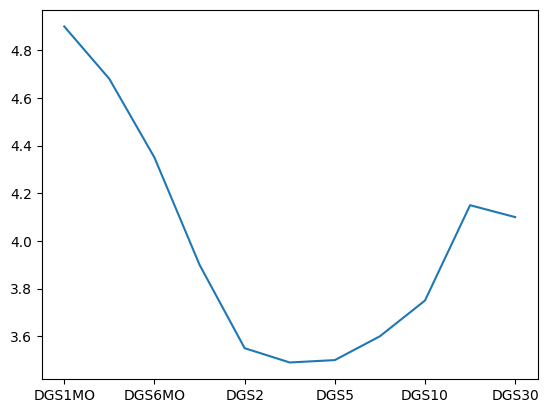

In [11]:
yieldcurve.iloc[-1, :].plot()

# (c)

In [12]:
pct_yieldcurve = yieldcurve.pct_change().dropna()
pct_yieldcurve

# (d)

,DGS1MO,DGS3MO,DGS6MO,DGS1,DGS2,DGS3,DGS5,DGS7,DGS10,DGS20,DGS30
DATE,,,,,,,,,,,
2014-09-30,1.000000,0.000000,-0.400000,0.181818,0.000000,0.009434,0.005650,0.004525,0.008000,0.010169,0.009434
2014-10-01,-0.500000,0.000000,0.333333,-0.230769,-0.086207,-0.065421,-0.050562,-0.045045,-0.039683,-0.036913,-0.028037
2014-10-02,0.000000,-0.500000,-0.250000,0.000000,0.000000,0.010000,0.005917,0.009434,0.008264,0.010453,0.009615
2014-10-03,0.000000,0.000000,0.000000,0.100000,0.075472,0.039604,0.017647,0.009346,0.004098,-0.003448,-0.006349
2014-10-06,0.000000,1.000000,0.666667,0.000000,-0.052632,-0.028571,-0.017341,-0.013889,-0.008163,-0.003460,-0.003195
...,...,...,...,...,...,...,...,...,...,...,...
2024-09-23,-0.004107,-0.006316,-0.006772,-0.002551,0.005634,0.002890,0.008621,0.008357,0.005362,0.004878,0.004914
2024-09-24,-0.014433,-0.006356,-0.009091,-0.007673,-0.022409,-0.008646,-0.011396,-0.005525,-0.002667,0.002427,0.000000
2024-09-25,0.002092,0.000000,0.000000,0.002577,0.011461,0.014535,0.014409,0.013889,0.013369,0.012107,0.012225


In [13]:
yieldcurve = yieldcurve[(yieldcurve['DGS1MO'] > 1e-10) & (yieldcurve['DGS3MO'] > 1e-10)]
pct_yieldcurve = yieldcurve.pct_change()
pct_yieldcurve.replace([np.inf, -np.inf], np.nan, inplace=True)
pct_yieldcurve.dropna(inplace=True)
pct_yieldcurve.describe()

# (e)

,DGS1MO,DGS3MO,DGS6MO,DGS1,DGS2,DGS3,DGS5,DGS7,DGS10,DGS20,DGS30
count,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000
mean,0.027856,0.019030,0.006499,0.003091,0.002043,0.001525,0.001038,0.000732,0.000623,0.000426,0.000341
std,0.290133,0.210112,0.128306,0.057384,0.051216,0.045966,0.039197,0.032735,0.030458,0.024103,0.021820
min,-0.875000,-0.894737,-0.777778,-0.560000,-0.342105,-0.318182,-0.300000,-0.247191,-0.270270,-0.201835,-0.208000
25%,-0.009901,-0.005566,-0.005369,-0.008008,-0.013267,-0.014973,-0.015952,-0.015028,-0.013734,-0.011236,-0.010408
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.010101,0.009558,0.009009,0.009852,0.015717,0.017188,0.016393,0.015625,0.014184,0.012173,0.011255
max,6.000000,3.000000,5.000000,0.600000,0.416667,0.450000,0.369565,0.358209,0.407407,0.333333,0.292929


In [14]:
Corr = pct_yieldcurve.corr()
Corr

# (f)

,DGS1MO,DGS3MO,DGS6MO,DGS1,DGS2,DGS3,DGS5,DGS7,DGS10,DGS20,DGS30
DGS1MO,1.000000,0.188904,0.217396,0.056267,0.020405,0.004936,-0.008948,-0.014786,-0.014040,-0.005080,0.000466
DGS3MO,0.188904,1.000000,0.409969,0.088750,0.051798,0.030594,0.034186,0.026539,0.042806,0.050142,0.057269
DGS6MO,0.217396,0.409969,1.000000,0.254517,0.103060,0.115737,0.101681,0.088344,0.102364,0.107770,0.109531
DGS1,0.056267,0.088750,0.254517,1.000000,0.436132,0.439542,0.400313,0.386468,0.356918,0.321508,0.310389
DGS2,0.020405,0.051798,0.103060,0.436132,1.000000,0.782545,0.749178,0.690694,0.621183,0.536349,0.500199
DGS3,0.004936,0.030594,0.115737,0.439542,0.782545,1.000000,0.913155,0.858190,0.792249,0.705824,0.660336
DGS5,-0.008948,0.034186,0.101681,0.400313,0.749178,0.913155,1.000000,0.953952,0.902452,0.822710,0.778442
DGS7,-0.014786,0.026539,0.088344,0.386468,0.690694,0.858190,0.953952,1.000000,0.966393,0.906689,0.871942
DGS10,-0.014040,0.042806,0.102364,0.356918,0.621183,0.792249,0.902452,0.966393,1.000000,0.957135,0.934663
DGS20,-0.005080,0.050142,0.107770,0.321508,0.536349,0.705824,0.822710,0.906689,0.957135,1.000000,0.975145


In [15]:
la.cholesky(Corr)

# (g)

array([[ 1.00000000e+00,  1.88903548e-01,  2.17395521e-01,
         5.62672498e-02,  2.04051296e-02,  4.93605641e-03,
        -8.94801166e-03, -1.47856037e-02, -1.40400229e-02,
        -5.07998192e-03,  4.66134372e-04],
       [ 0.00000000e+00,  9.81995646e-01,  3.75665781e-01,
         7.95535249e-02,  4.88227086e-02,  3.02053892e-02,
         3.65342528e-02,  2.98700386e-02,  4.62921281e-02,
         5.20385090e-02,  5.82289875e-02],
       [ 0.00000000e+00,  0.00000000e+00,  9.00896447e-01,
         2.35764489e-01,  8.91150933e-02,  1.14682080e-01,
         9.97907712e-02,  8.91742527e-02,  9.77096536e-02,
         9.91519553e-02,  9.71860618e-02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         9.66912788e-01,  4.24122617e-01,  4.23847180e-01,
         3.87194309e-01,  3.76352027e-01,  3.42314705e-01,
         3.04347428e-01,  2.92495602e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  8.99654645e-01,  6.56904086e-01,
  

In [16]:
eigval, eigenvr = la.eig(Corr)
eigval, eigenvr

# (h)

(array([6.07778628+0.j, 1.59349134+0.j, 0.93355772+0.j, 0.85225235+0.j,
        0.63799802+0.j, 0.52328232+0.j, 0.22193649+0.j, 0.08761501+0.j,
        0.03375136+0.j, 0.01721253+0.j, 0.02111658+0.j]),
 array([[-4.40760233e-03,  4.42145731e-01, -2.31702779e-01,
          8.63803162e-01,  8.35302467e-03, -6.54380200e-02,
         -1.33237793e-02, -9.71060612e-03, -3.24518911e-03,
         -3.01218078e-03, -1.52117177e-03],
        [-2.99205554e-02,  5.87023587e-01, -2.37204577e-01,
         -3.92380560e-01, -5.09241196e-01, -4.28065061e-01,
         -4.06714540e-02,  7.23639292e-04, -5.35385084e-03,
          5.25342366e-03, -1.51909237e-03],
        [-6.51917889e-02,  6.21707912e-01,  3.85716084e-02,
         -2.64156891e-01,  3.76051481e-01,  6.29054537e-01,
          1.69150029e-02, -2.06729664e-02, -6.67248658e-03,
          8.00375112e-03,  4.03398471e-03],
        [-1.95617422e-01,  2.35464427e-01,  6.74362455e-01,
          1.42409618e-02,  4.07609179e-01, -5.31764553e-01,
      

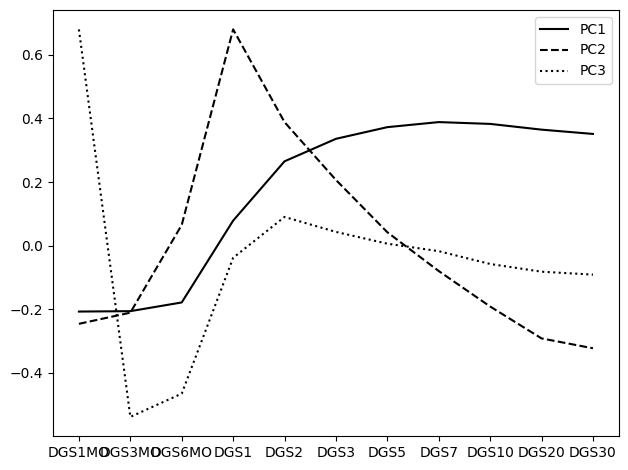

In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_corr = pca.fit_transform(Corr)

fig, ax = plt.subplots()
ax.plot(pct_yieldcurve.columns, pca.components_[0], 'k', label='PC1')
ax.plot(pct_yieldcurve.columns, pca.components_[1], 'k--', label='PC2')
ax.plot(pct_yieldcurve.columns, pca.components_[2], 'k:', label='PC3')
ax.legend()
fig.tight_layout()
plt.show()

# (i)

In [18]:
pca = PCA(n_components=0.95)
pca.fit(pct_yieldcurve)

pca.n_components_

# (j)

4

In [19]:
sig = np.sqrt(pca.explained_variance_)
sig

array([0.2981456 , 0.20887361, 0.11366425, 0.08992273])

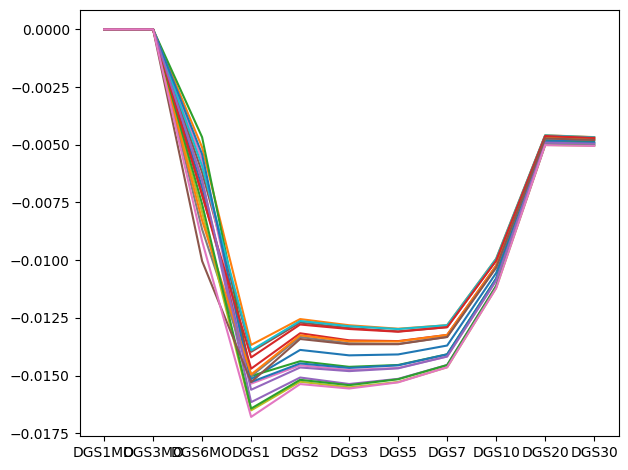

In [20]:
yclist = np.zeros((17,len(pct_yieldcurve.columns)))
yclist[0] = pct_yieldcurve.tail(1)
for i in range(2):
    for j in range(2):
        for k in range(2):
            for l in range(2):
                yclist[2*(2*(2*i+j)+k)+l+1, :] = yclist[0]*np.exp(
                    + pca.components_[0]*1.65*(2*i-1)*sig[0] 
                    + pca.components_[1]*1.65*(2*j-1)*sig[1] 
                    + pca.components_[2]*1.65*(2*k-1)*sig[2]
                    + pca.components_[3]*1.65*(2*l-1)*sig[3])

fig, ax = plt.subplots()
ax.plot(pct_yieldcurve.columns, yclist.T)
fig.tight_layout()
plt.show()

# (l)


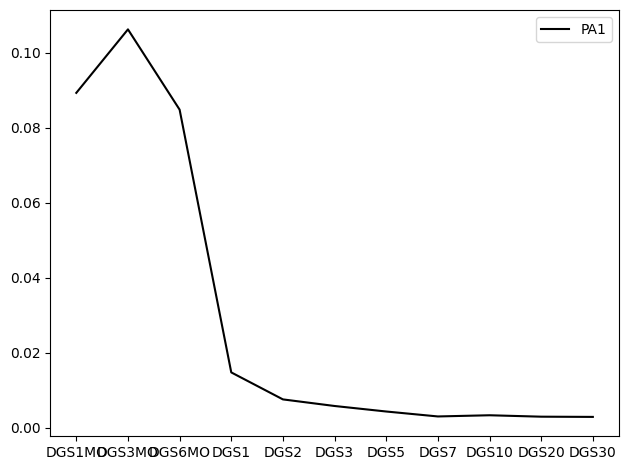

In [21]:
R = pct_yieldcurve.cov().values
n = R.shape[0]
Rn = np.linalg.solve(R, np.identity(n))
smc = np.diag(R) - 1/np.diag(Rn)
di = np.diag_indices(n)
R[di] = smc
w, v = np.linalg.eig(R)
totprop = 0
for i in w:
    totprop += i / np.sum(w)

nf = 1
lam = v[:,:nf]@np.diag(np.sqrt(w[:nf]))
h2 = np.sum(lam**2, axis=1)
u2 = 1 -  h2
com = np.sum(lam**2, axis=1)**2 / np.sum(lam**4, axis=1)
corpa = pd.DataFrame(np.column_stack((np.round(lam[:,0], 2),
                      np.round(h2, 2),
                      np.round(u2, 3),
                      np.round(com, 1))),
                      columns=['PA1', 'h2', 'u2', 'com'])

fig, ax = plt.subplots()
ax.plot(pct_yieldcurve.columns, lam[:,0], 'k', label='PA1')
ax.legend()
fig.tight_layout()
plt.show()

# (m)